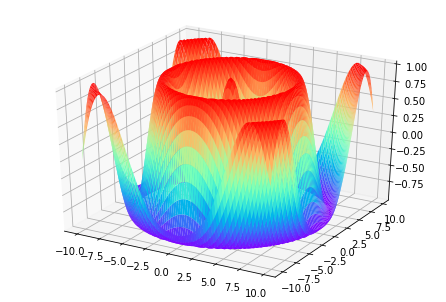

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np

from mpl_toolkits.mplot3d import Axes3D

figure = plt.figure()

ax = Axes3D(figure)

X = np.arange(-10, 10, 0.25)

Y = np.arange(-10, 10, 0.25)

#网格化数据

X, Y = np.meshgrid(X, Y)

R = np.sqrt(X**2 + Y**2)

Z = np.cos(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')

plt.show()

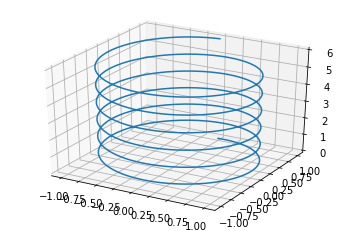

In [4]:
from mpl_toolkits.mplot3d import Axes3D

import numpy as np

import matplotlib.pyplot as plt

#生成画布

figure=plt.figure()

ax=figure.add_subplot(111,projection='3d')

#生成向量

z=np.linspace(0,6,1000)

r=1

x=r*np.sin(np.pi*2*z)

y=r*np.cos(np.pi*2*z)

ax.plot(x,y,z)

plt.show()

In [6]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt
import numpy as np

with cbook.get_sample_data('jacksboro_fault_dem.npz') as file, \
     np.load(file) as dem:
    z = dem['elevation']
    nrows, ncols = z.shape
    x = np.linspace(dem['xmin'], dem['xmax'], ncols)
    y = np.linspace(dem['ymin'], dem['ymax'], nrows)
    x, y = np.meshgrid(x, y)

region = np.s_[5:50, 5:50]
x, y, z = x[region], y[region], z[region]

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
fig.savefig("surface3d_frontpage.png", dpi=25)  # results in 160x120 px image

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Anaconda3\\envs\\tensorflow-cpu-newst\\lib\\site-packages\\matplotlib\\mpl-data\\sample_data\\jacksboro_fault_dem.npz'

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.colors as colors

filename = cbook.get_sample_data('topobathy.npz', asfileobj=False)
with np.load(filename) as dem:
    topo = dem['topo']
    longitude = dem['longitude']
    latitude = dem['latitude']

fig, ax = plt.subplots(constrained_layout=True)
# make a colormap that has land and ocean clearly delineated and of the
# same length (256 + 256)
colors_undersea = plt.cm.terrain(np.linspace(0, 0.17, 256))
colors_land = plt.cm.terrain(np.linspace(0.25, 1, 256))
all_colors = np.vstack((colors_undersea, colors_land))
terrain_map = colors.LinearSegmentedColormap.from_list('terrain_map',
    all_colors)

# make the norm:  Note the center is offset so that the land has more
# dynamic range:
divnorm = colors.DivergingNorm(vmin=-500, vcenter=0, vmax=4000)

pcm = ax.pcolormesh(longitude, latitude, topo, rasterized=True, norm=divnorm,
    cmap=terrain_map,)
ax.set_xlabel('Lon $[^o E]$')
ax.set_ylabel('Lat $[^o N]$')
ax.set_aspect(1 / np.cos(np.deg2rad(49)))
fig.colorbar(pcm, shrink=0.6, extend='both', label='Elevation [m]')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Anaconda3\\envs\\tensorflow-cpu-newst\\lib\\site-packages\\matplotlib\\mpl-data\\sample_data\\topobathy.npz'

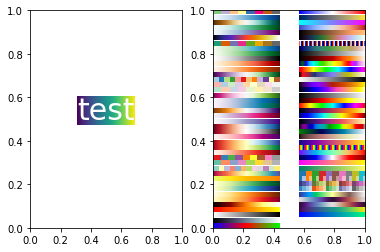

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image import BboxImage
from matplotlib.transforms import Bbox, TransformedBbox


fig, (ax1, ax2) = plt.subplots(ncols=2)

# ----------------------------
# Create a BboxImage with Text
# ----------------------------
txt = ax1.text(0.5, 0.5, "test", size=30, ha="center", color="w")
kwargs = dict()

bbox_image = BboxImage(txt.get_window_extent,
                       norm=None,
                       origin=None,
                       clip_on=False,
                       **kwargs
                       )
a = np.arange(256).reshape(1, 256)/256.
bbox_image.set_data(a)
ax1.add_artist(bbox_image)

# ------------------------------------
# Create a BboxImage for each colormap
# ------------------------------------
a = np.linspace(0, 1, 256).reshape(1, -1)
a = np.vstack((a, a))

# List of all colormaps; skip reversed colormaps.
maps = sorted(m for m in plt.cm.cmap_d if not m.endswith("_r"))

ncol = 2
nrow = len(maps)//ncol + 1

xpad_fraction = 0.3
dx = 1./(ncol + xpad_fraction*(ncol - 1))

ypad_fraction = 0.3
dy = 1./(nrow + ypad_fraction*(nrow - 1))

for i, m in enumerate(maps):
    ix, iy = divmod(i, nrow)

    bbox0 = Bbox.from_bounds(ix*dx*(1 + xpad_fraction),
                             1. - iy*dy*(1 + ypad_fraction) - dy,
                             dx, dy)
    bbox = TransformedBbox(bbox0, ax2.transAxes)

    bbox_image = BboxImage(bbox,
                           cmap=plt.get_cmap(m),
                           norm=None,
                           origin=None,
                           **kwargs
                           )

    bbox_image.set_data(a)
    ax2.add_artist(bbox_image)

plt.show()

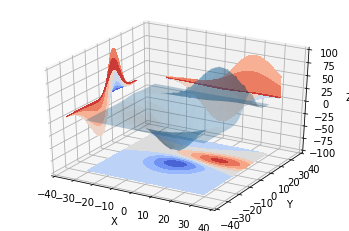

In [9]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)

# Plot the 3D surface
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph
cset = ax.contourf(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlim(-40, 40)
ax.set_ylim(-40, 40)
ax.set_zlim(-100, 100)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [10]:
from PIL import Image
im = Image.open("bride.jpg")
im.rotate(45).show()

FileNotFoundError: [Errno 2] No such file or directory: 'bride.jpg'

[-0.56809912  0.96072116  3.36147607]


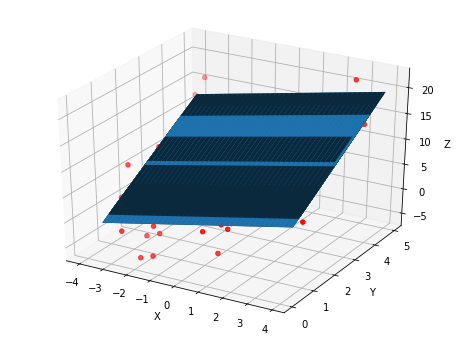

In [3]:
%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# 三维，两个特征
fig = plt.figure(figsize=(8, 6)) #设置图标的大小
ax = fig.add_subplot(111, projection='3d') # 111的意思是把画布分为1行1列，画在第一个方格内。其实就是整个画布。

# 创建样本，注意两个特征不能线性相关，否则无法用最小二乘解参数
X1 = np.arange(-4, 4, 0.1)
m = len(X1)
X2 = np.random.rand(m)*5
# print(X2)
# print(X1)

# 堆叠全1数组和X1以及X2形成样本的矩阵，倒置，用以矩阵乘法
X = np.vstack((np.full(m, 1), X1, X2)).T

# y = 15*X1 + 3 * X2 + theta0
# 自定义样本输出
Y = X1 + 3 * X2 + 3*np.random.randn(m)

# 利用标准方程(最小二乘法求解theta)
theta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X), X)),
np.transpose(X)), Y)
print(theta)

# 构造网格 meshgrid函数可以通过延伸矩阵构造多维坐标中的网格坐标。
M, N = np.meshgrid(X1, X2)

# zip函数构建一个多元祖[(x1,y1),(x2,y2)...],ravel函数将一个多维数组合并成一维数组
Z = np.array([theta[1] * d + theta[2]*p + theta[0] for d, p in zip(np.ravel(M), np.ravel(N))]).reshape(M.shape)

# 根据网格和函数构建图形 suface是一个完整的面
ax.plot_surface(M, N, Z)
# scatter是散点图
ax.scatter(X1, X2, Y, c='r')
# 设置坐标轴的名称
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

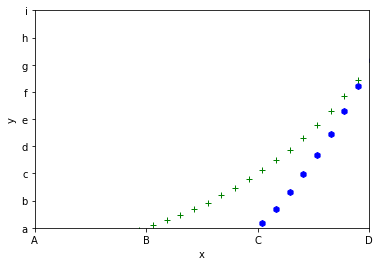

In [50]:
#网易云课堂 莫烦课程
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-3,3,50)
y1 = 2**x+1
y2 = x**2+1

#plt.figure()
#plt.plot(x,y1)

#plt.figure()
plt.plot(x,y2,'bh',x,y1,'g+')
plt.xlim(0,2)
plt.ylim(2,6)
plt.xlabel('x')
plt.ylabel('y')
plt.xticks(np.linspace(-1,2,4),list('ABCD'))
plt.yticks(np.linspace(2,6,9),list('abcdefghi'))
plt.show()


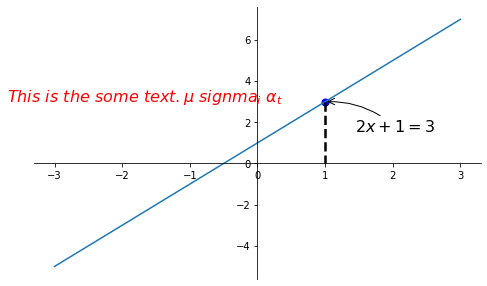

In [64]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3,3,50)
y = 2*x+1

plt.figure(num=1,figsize=(8,5))
plt.plot(x,y)

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

x0 = 1
y0 = 2*x0+1
plt.scatter(x0,y0,s=50,color='b' )
plt.plot([x0,x0],[y0,0],'k--',lw=2.5)
plt.annotate(r'$2x+1=%s$'%y0,xy=(x0,y0),xycoords='data',xytext=(+30,-30),textcoords='offset points',
             fontsize=16,arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=.2'))
plt.text(-3.7,3,r'$This\ is\ the\ some\ text.\mu\ signma_i\ \alpha_t$',
        fontdict={'size':16,'color':'r'})
plt.show()

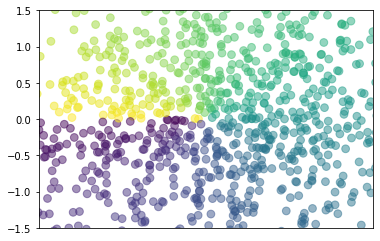

In [73]:
import matplotlib.pyplot as plt
import numpy as np

n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)
T = np.arctan2(Y,X) #颜色值

plt.scatter(X,Y,s=60,c=T,alpha=0.5)
plt.xlim((-1.5,1.5))
plt.ylim((-1.5,1.5))
plt.xticks(())
plt.show()

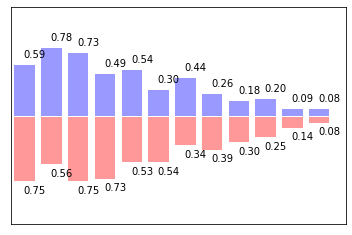

In [75]:
import matplotlib.pyplot as plt
import numpy as np

n = 12
X = np.arange(n)
Y1 = (1-X/float(n))*np.random.uniform(0.5,1.0,n)
Y2 = (1-X/float(n))*np.random.uniform(0.5,1.0,n)

plt.bar(X,+Y1,facecolor='#9999ff',edgecolor='white')
plt.bar(X,-Y2,facecolor='#ff9999',edgecolor='white')

for x,y in zip(X,Y1):
    plt.text(x+0.4,y+0.05,'%.2f'%y,ha='center',va='bottom')
    
for x,y in zip(X,Y2):
    plt.text(x+0.4,-y-0.05,'%.2f'%y,ha='center',va='top')
    
plt.xlim(-.5,n)
plt.xticks(())
plt.ylim(-1.25,1.25)
plt.yticks(())

plt.show()

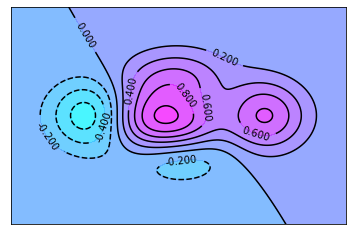

In [87]:
import matplotlib.pyplot as plt
import numpy as np
from ipykernel import kernelapp as app

#等高线的高度计算
def f(x,y):
    return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)

n = 256
x = np.linspace(-3,3,n)
y = np.linspace(-3,3,n)
X,Y = np.meshgrid(x,y)  #网格点的坐标矩阵

plt.contourf(X,Y,f(X,Y),8,alpha=0.75,cmap=plt.cm.cool)#线的点

C = plt.contour(X,Y,f(X,Y),8,colors='black')

plt.clabel(C,inline=True,fontsize=10) #等高线的标签

plt.xticks(())
plt.yticks(())
plt.show()

[[0.3     0.34375 0.3875 ]
 [0.43125 0.475   0.51875]
 [0.5625  0.60625 0.65   ]]


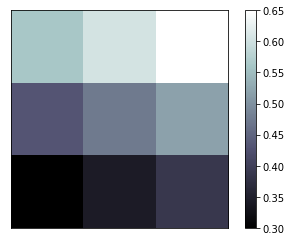

In [1]:
import matplotlib.pyplot as plt
import numpy as np

a = np.linspace(0.3,0.65,9).reshape(3,3)

plt.imshow(a,interpolation='nearest',cmap='bone',origin='lower')
plt.colorbar()
print(a)
plt.xticks(())
plt.yticks(())
plt.show()

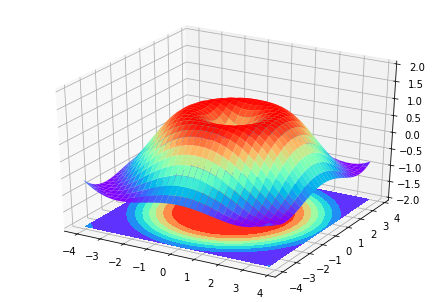

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

X = np.arange(-4,4,0.25)
Y = np.arange(-4,4,0.25)

X,Y = np.meshgrid(X,Y)
R = np.sqrt(X**2+Y**2)
Z = np.sin(R)

ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap=plt.get_cmap('rainbow'))
ax.contourf(X,Y,Z,zdir='z',offset=-2,cmap='rainbow')
ax.set_zlim(-2,2)

plt.show()

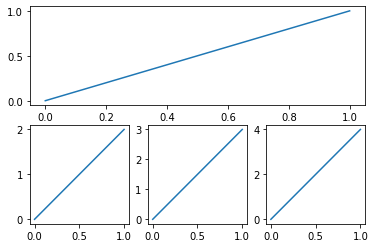

In [16]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(2,1,1)
plt.plot([0,1],[0,1])

plt.subplot(2,3,4)
plt.plot([0,1],[0,2])

plt.subplot(2,3,5)
plt.plot([0,1],[0,3])

plt.subplot(2,3,6)
plt.plot([0,1],[0,4])



plt.show()

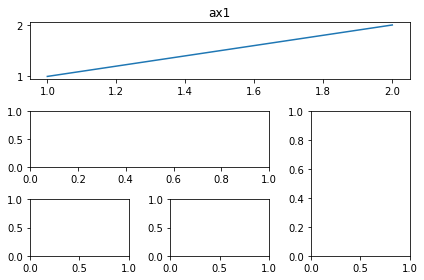

In [26]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#方法1
plt.figure()
ax1 = plt.subplot2grid((3,3),(0,0),colspan=3,rowspan=1)
ax1.plot([1,2],[1,2])
ax1.set_title('ax1')
ax2 = plt.subplot2grid((3,3),(1,0),colspan=2,rowspan=1)
ax3 = plt.subplot2grid((3,3),(1,2),colspan=1,rowspan=2)
ax4 = plt.subplot2grid((3,3),(2,0),colspan=1,rowspan=1)
ax5 = plt.subplot2grid((3,3),(2,1),colspan=1,rowspan=1)
plt.tight_layout()
plt.show()

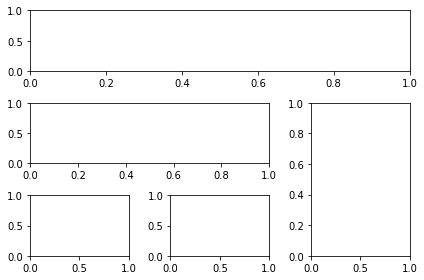

In [31]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

plt.figure()

gs = gridspec.GridSpec(3,3)

ax1 = plt.subplot(gs[0,:])
ax2 = plt.subplot(gs[1,:2])
ax1 = plt.subplot(gs[1:,2])
ax1 = plt.subplot(gs[2,:1])
ax1 = plt.subplot(gs[2,1:2])

plt.tight_layout()
plt.show()

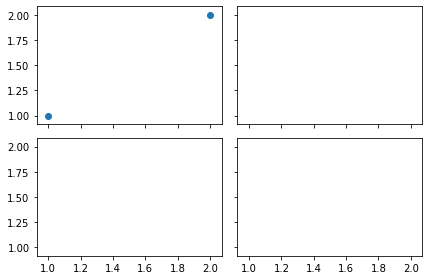

In [35]:
import matplotlib.pyplot as plt

f,((ax11,ax12),(ax21,ax22)) = plt.subplots(2,2,sharex=True,sharey=True)
ax11.scatter([1,2],[1,2])
plt.tight_layout()
plt.show()

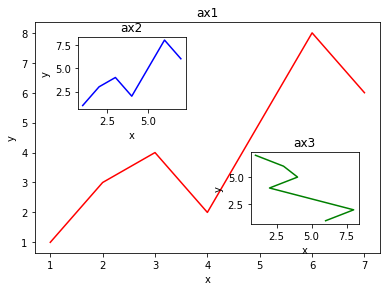

In [53]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure()

x = np.arange(1,8)
y = [1,3,4,2,5,8,6]
#print(y[::-1])
left,bottom,width,height = 0.1,0.1,0.8,0.8

ax1 = fig.add_axes([left,bottom,width,height])
ax1.plot(x,y,'r')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('ax1')

ax2 = fig.add_axes([0.2,0.6,0.25,0.25])
ax2.plot(x,y,'b')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('ax2')
#plt.tight_layout()

plt.axes([.6,.2,.25,.25])
plt.plot(y[::-1],x,'g')
plt.xlabel('x')
plt.ylabel('y')
plt.title('ax3')
plt.show()

<IPython.core.display.Javascript object>


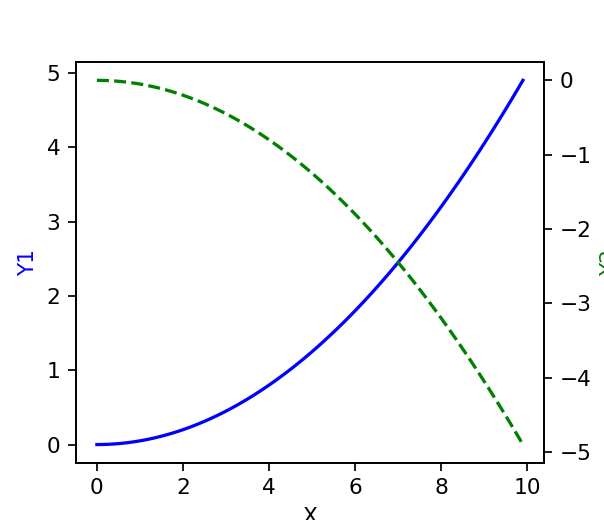

In [68]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0,10,0.1)
y1 =0.05*x**2
y2 = -1*y1

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(x,y1,'b-')
ax2.plot(x,y2,'g--')

ax1.set_xlabel('X')
ax1.set_ylabel('Y1',color='b')
ax2.set_ylabel('Y2',color='g')

plt.show()

<IPython.core.display.Javascript object>


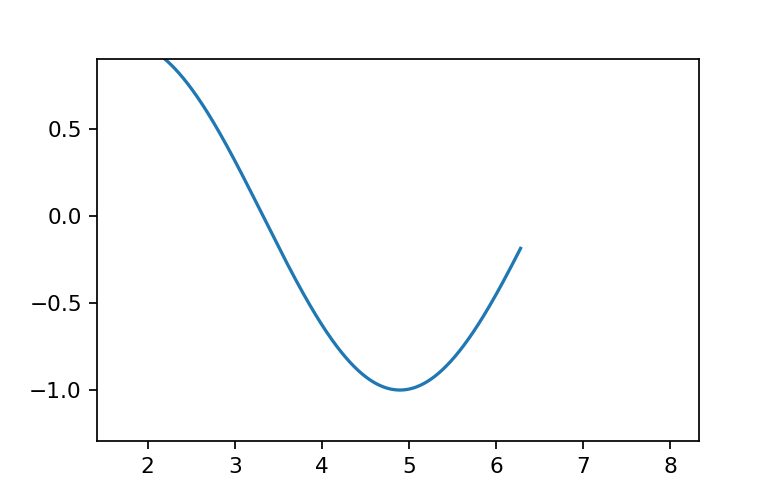

In [67]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np

fig,ax = plt.subplots()
x = np.arange(0,2*np.pi,0.01)
line,=ax.plot(x,np.sin(x))
def animate(i):
    line.set_ydata(np.sin(x+i/10))
    return line,
def init():
    line.set_ydata(np.sin(x))
    return line,
ani = animation.FuncAnimation(fig=fig,func=animate,frames=100,init_func=init,interval=20,blit=True)
plt.show()